In [54]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
pd.options.mode.copy_on_write = True

In [2]:
df_2021 = pd.read_csv('Data/formula1_2021season_raceResults.csv')
df_2022 = pd.read_csv('Data/Formula1_2022season_raceResults.csv')
df_2023 = pd.read_csv('Data/Formula1_2023season_raceResults.csv')
df_2024 = pd.read_csv('Data/Formula1_2024season_raceResults.csv')
df_2024.head(20)

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364
2,Bahrain,3,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507
3,Bahrain,4,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090
4,Bahrain,5,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065
5,Bahrain,6,4,Lando Norris,McLaren Mercedes,7,57,+48.458,8,No,1:34.476
6,Bahrain,7,44,Lewis Hamilton,Mercedes,9,57,+50.324,6,No,1:34.722
7,Bahrain,8,81,Oscar Piastri,McLaren Mercedes,8,57,+56.082,4,No,1:34.983
8,Bahrain,9,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,57,+74.887,2,No,1:34.199
9,Bahrain,10,18,Lance Stroll,Aston Martin Aramco Mercedes,12,57,+93.216,1,No,1:35.632


In [3]:
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023
df_2024['Year'] = 2024
df_2024

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Year
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:31:44.742,26,Yes,1:32.608,2024
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,5,57,+22.457,18,No,1:34.364,2024
2,Bahrain,3,55,Carlos Sainz,Ferrari,4,57,+25.110,15,No,1:34.507,2024
3,Bahrain,4,16,Charles Leclerc,Ferrari,2,57,+39.669,12,No,1:34.090,2024
4,Bahrain,5,63,George Russell,Mercedes,3,57,+46.788,10,No,1:35.065,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
94,China,16,20,Kevin Magnussen,Haas Ferrari,17,56,+87.533,0,No,1:41.077,2024
95,China,17,2,Logan Sargeant,Williams Mercedes,20,56,+95.110,0,No,1:41.000,2024
96,China,NC,3,Daniel Ricciardo,RB Honda RBPT,12,33,DNF,0,No,1:40.994,2024
97,China,NC,22,Yuki Tsunoda,RB Honda RBPT,19,26,DNF,0,No,1:41.593,2024


In [4]:
df = pd.concat([df_2021, df_2022, df_2023, df_2024])
df

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap,Year,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015,2021,NaN,NaN
1,Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,1.0,56,+0.745,18.0,No,1:33.228,2021,NaN,NaN
2,Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,+37.383,16.0,Yes,1:32.090,2021,NaN,NaN
3,Bahrain,4,4,Lando Norris,McLaren Mercedes,7.0,56,+46.466,12.0,No,1:34.396,2021,NaN,NaN
4,Bahrain,5,11,Sergio Perez,Red Bull Racing Honda,11.0,56,+52.047,10.0,No,1:33.970,2021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,China,16,20,Kevin Magnussen,Haas Ferrari,17.0,56,+87.533,0.0,NaN,NaN,2024,No,1:41.077
95,China,17,2,Logan Sargeant,Williams Mercedes,20.0,56,+95.110,0.0,NaN,NaN,2024,No,1:41.000
96,China,NC,3,Daniel Ricciardo,RB Honda RBPT,12.0,33,DNF,0.0,NaN,NaN,2024,No,1:40.994
97,China,NC,22,Yuki Tsunoda,RB Honda RBPT,19.0,26,DNF,0.0,NaN,NaN,2024,No,1:41.593


In [5]:
df['Team'].unique()

array(['Mercedes', 'Red Bull Racing Honda', 'McLaren Mercedes', 'Ferrari',
       'AlphaTauri Honda', 'Aston Martin Mercedes',
       'Alfa Romeo Racing Ferrari', 'Alpine Renault', 'Williams Mercedes',
       'Haas Ferrari', 'Alfa Romeo Ferrari', 'AlphaTauri RBPT',
       'Aston Martin Aramco Mercedes', 'Red Bull Racing RBPT',
       'Red Bull Racing Honda RBPT', 'AlphaTauri Honda RBPT',
       'Kick Sauber Ferrari', 'RB Honda RBPT',
       'Aston Matin Aramco Mercedes'], dtype=object)

In [14]:
clean_team_name_change_dict = {
    'Red Bull Racing Honda': 'Red Bull Racing RBPT',
    'Red Bull Racing Honda RBPT': 'Red Bull Racing RBPT',
    'AlphaTauri Honda': 'RB Honda RBPT',
    'AlphaTauri Honda RBPT': 'RB Honda RBPT',
    'AlphaTauri RBPT': 'RB Honda RBPT',
    'Alfa Romeo Racing Ferrari': 'Kick Sauber Ferrari',
    'Alfa Romeo Ferrari': 'Kick Sauber Ferrari',
    'Aston Martin Aramco Mercedes': 'Aston Martin Mercedes',
    'Aston Matin Aramco Mercedes': 'Aston Martin Mercedes',
}


In [17]:
current_team = df['Team']
for k in clean_team_name_change_dict.keys():
    current_team[current_team == k] = clean_team_name_change_dict[k]
# df['Current Team'][df['Current Team'] == 'Red Bull Racing Honda'] = 'Red Bull Racing RBPT'
# df['Current Team'][df['Current Team'] == 'AlphaTauri Honda'] = 'RB Honda RBPT'
# df['Current Team'][df['Current Team'] == 'AlphaTauri Honda RBPT'] = 'RB Honda RBPT'
# df['Current Team'][df['
df['Current Team'] = current_team
df['Current Team'].unique()

array(['Mercedes', 'Red Bull Racing RBPT', 'McLaren Mercedes', 'Ferrari',
       'RB Honda RBPT', 'Aston Martin Mercedes', 'Kick Sauber Ferrari',
       'Alpine Renault', 'Williams Mercedes', 'Haas Ferrari'],
      dtype=object)

In [18]:
df['Position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', 'NC', '19', '20', 'DQ'],
      dtype=object)

In [36]:
clean_position = df['Position']
clean_position[df['Position'] == 'DQ'] = '21'
clean_position[df['Position'] == 'NC'] = '21'
clean_position = clean_position.astype('float')
df['Clean Position'] = clean_position
# df['Clean Position'].unique()

In [37]:
x_params = ['Current Team', 'Driver', 'Year']
df_var = df.loc[:,x_params]
# df_var = df.loc[:,['Current Team', 'Driver', 'Track', 'Year']]
df_var.head(5)

,Current Team,Driver,Year
0,Mercedes,Lewis Hamilton,2021
1,Red Bull Racing RBPT,Max Verstappen,2021
2,Mercedes,Valtteri Bottas,2021
3,McLaren Mercedes,Lando Norris,2021
4,Red Bull Racing RBPT,Sergio Perez,2021


In [38]:
df_x = pd.get_dummies(df_var, columns=x_params, dtype='float')
df_x

,Current Team_Alpine Renault,Current Team_Aston Martin Mercedes,Current Team_Ferrari,Current Team_Haas Ferrari,Current Team_Kick Sauber Ferrari,Current Team_McLaren Mercedes,Current Team_Mercedes,Current Team_RB Honda RBPT,Current Team_Red Bull Racing RBPT,Current Team_Williams Mercedes,...,Driver_Pierre Gasly,Driver_Robert Kubica,Driver_Sebastian Vettel,Driver_Sergio Perez,Driver_Valtteri Bottas,Driver_Yuki Tsunoda,Year_2021,Year_2022,Year_2023,Year_2024
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [39]:
X = df_x.to_numpy()

In [40]:
X.shape

(1419, 44)

In [41]:
y = df['Clean Position'].to_numpy()
y

array([ 1.,  2.,  3., ..., 21., 21., 21.])

In [42]:
y.shape

(1419,)

In [65]:
X_data, X_test = X[:-20], X[-20:]
y_data, y_test = y[:-20], y[-20:]

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.1, random_state=42)

In [80]:
n_tree = 1000
rfr = RandomForestRegressor(n_tree, criterion='absolute_error')

In [ ]:
rfr.fit(X_train, y_train)

In [ ]:
y_val_hat = rfr.predict(X_val)
r_squared = rfr.score(X_val, y_val)
r_squared

In [ ]:
plt.plot(y_val_hat, y_val, '.');
plt.xlim([0,12])
plt.xticks(np.arange(1,13))
plt.yticks(np.arange(1,21))
plt.xlabel('Predicted Finish')
plt.ylabel('Actual Finish');

In [71]:
y_test_hat = rfr.predict(X_test)

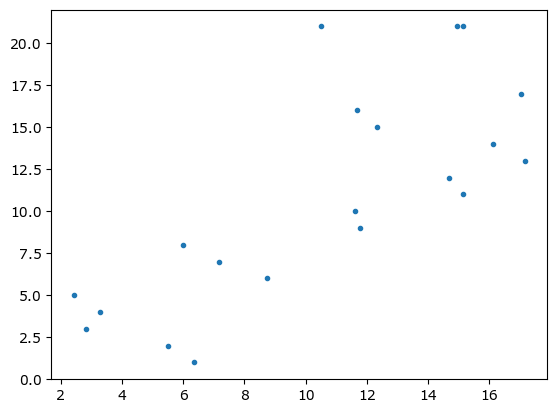

In [72]:
plt.plot(y_test_hat, y_test, '.')

In [74]:
test_data = df[-20:]

In [75]:
test_data['Predicted Position'] = y_test_hat

In [76]:
test_data

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap,Year,Set Fastest Lap,Fastest Lap Time,Current Team,Clean Position,Predicted Position
79,China,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1.0,56,1:40:52.554,25.0,NaN,NaN,2024,No,1:38.406,Red Bull Racing RBPT,1.0,6.352528
80,China,2,4,Lando Norris,McLaren Mercedes,4.0,56,+13.773,18.0,NaN,NaN,2024,No,1:38.751,McLaren Mercedes,2.0,5.507004
81,China,3,11,Sergio Perez,Red Bull Racing Honda RBPT,2.0,56,+19.160,15.0,NaN,NaN,2024,No,1:39.388,Red Bull Racing RBPT,3.0,2.832250
82,China,4,16,Charles Leclerc,Ferrari,6.0,56,+23.623,12.0,NaN,NaN,2024,No,1:39.384,Ferrari,4.0,3.284179
83,China,5,55,Carlos Sainz,Ferrari,7.0,56,+33.983,10.0,NaN,NaN,2024,No,1:39.764,Ferrari,5.0,2.434213
84,China,6,63,George Russell,Mercedes,8.0,56,+38.724,8.0,NaN,NaN,2024,No,1:40.112,Mercedes,6.0,8.742134
85,China,7,14,Fernando Alonso,Aston Martin Aramco Mercedes,3.0,56,+43.414,7.0,NaN,NaN,2024,Yes,1:37.810,Aston Martin Mercedes,7.0,7.171619
86,China,8,81,Oscar Piastri,McLaren Mercedes,5.0,56,+56.198,4.0,NaN,NaN,2024,No,1:39.739,McLaren Mercedes,8.0,5.989907
87,China,9,44,Lewis Hamilton,Mercedes,18.0,56,+57.986,2.0,NaN,NaN,2024,No,1:40.835,Mercedes,9.0,11.790690
88,China,10,27,Nico Hulkenberg,Haas Ferrari,9.0,56,+60.476,1.0,NaN,NaN,2024,No,1:40.815,Haas Ferrari,10.0,11.613855
